In [89]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import warnings
warnings.filterwarnings('ignore')

In [3]:
# reads csv files in the folder My Drive/DA Bootcamp/_DA-project_/datasets/
population = pd.read_csv('../datasets/population.csv') #My Drive/DA Bootcamp/_DA-project_/datasets/population.csv
# copy of the df before making any changes
raw_population = population.copy()

In [4]:
population.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               70080 non-null  int64 
 1   District.Code      70080 non-null  int64 
 2   District.Name      70080 non-null  object
 3   Neighborhood.Code  70080 non-null  int64 
 4   Neighborhood.Name  70080 non-null  object
 5   Gender             70080 non-null  object
 6   Age                70080 non-null  object
 7   Number             70080 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [6]:
pop_col = list(population.columns)
pop_col

['Year',
 'District.Code',
 'District.Name',
 'Neighborhood.Code',
 'Neighborhood.Name',
 'Gender',
 'Age',
 'Number']

In [7]:
population.describe()

,Year,District.Code,Neighborhood.Code,Number
count,70080.000000,70080.000000,70080.000000,70080.000000
mean,2015.000000,6.246575,37.000000,114.844720
std,1.414224,2.788356,21.071458,96.540389
min,2013.000000,1.000000,1.000000,0.000000
25%,2014.000000,4.000000,19.000000,43.000000
50%,2015.000000,7.000000,37.000000,92.000000
75%,2016.000000,8.000000,55.000000,162.000000
max,2017.000000,10.000000,73.000000,777.000000


In [8]:
population.isnull().sum()

Year                 0
District.Code        0
District.Name        0
Neighborhood.Code    0
Neighborhood.Name    0
Gender               0
Age                  0
Number               0
dtype: int64

In [9]:
population.duplicated().sum()

np.int64(4277)

In [10]:
70080 - 4277

65803

In [11]:
population[population.duplicated()]

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
101,2017,6,Gràcia,29,el Coll,Male,0-4,37
112,2017,7,Horta-Guinardó,40,Montbau,Male,0-4,19
143,2017,10,Sant Martí,71,Provençals del Poblenou,Male,0-4,97
157,2017,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Male,0-4,6
183,2017,7,Horta-Guinardó,38,la Teixonera,Male,0-4,50
...,...,...,...,...,...,...,...,...
69975,2013,7,Horta-Guinardó,42,la Clota,Female,90-94,0
69982,2013,8,Nou Barris,49,Canyelles,Female,90-94,1
69987,2013,8,Nou Barris,54,Torre Baró,Female,90-94,1
69991,2013,9,Sant Andreu,58,Baró de Viver,Female,90-94,1


In [12]:
population[(population["Year"] == 2017)&(population["District.Code"] == 6)&(population["Neighborhood.Code"] == 29)
&(population["Gender"] == "Male")&(population["Age"] == "0-4")]

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
28,2017,6,Gràcia,29,el Coll,Male,0-4,37
101,2017,6,Gràcia,29,el Coll,Male,0-4,37
174,2017,6,Gràcia,29,el Coll,Male,0-4,41
247,2017,6,Gràcia,29,el Coll,Male,0-4,36
320,2017,6,Gràcia,29,el Coll,Male,0-4,32


In [13]:
population_duplicates = pd.DataFrame(population.value_counts()[lambda x: x>1].sort_values(ascending = False))
population_duplicates

count
Year District.Code District.Name  Neighborhood.Code Neighborhood.Name                            Gender Age   Number       
2013 8             Nou Barris     54                Torre Baró                                   Male   90-94 0           5
2016 7             Horta-Guinardó 42                la Clota                                     Female 85-89 1           5
2017 7             Horta-Guinardó 42                la Clota                                     Female 85-89 1           5
2014 3             Sants-Montjuïc 12                la Marina del Prat Vermell                   Male   90-94 0           5
     8             Nou Barris     54                Torre Baró                                   Male   90-94 0           4
...                                                                                                                     ...
     9             Sant Andreu    58                Baró de Viver                                Female 30-34 21          2
2017 10            Sant Martí     69                Diagonal Mar i el Front Marítim del Poblenou Female 20-24 37          2
                                                                                                        25-29 59          2
                                                                                                        30-34 91          2
     6             Gràcia         29                el Coll                                      Female 50-54 56          2

[3939 rows x 1 columns]

In [14]:
population_duplicates.reset_index()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number,count
0,2013,8,Nou Barris,54,Torre Baró,Male,90-94,0,5
1,2016,7,Horta-Guinardó,42,la Clota,Female,85-89,1,5
2,2017,7,Horta-Guinardó,42,la Clota,Female,85-89,1,5
3,2014,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Male,90-94,0,5
4,2014,8,Nou Barris,54,Torre Baró,Male,90-94,0,4
...,...,...,...,...,...,...,...,...,...
3934,2014,9,Sant Andreu,58,Baró de Viver,Female,30-34,21,2
3935,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Female,20-24,37,2
3936,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Female,25-29,59,2
3937,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Female,30-34,91,2


In [15]:
#population.drop_duplicates(inplace=True)

In [16]:
population.duplicated().sum()

np.int64(4277)

In [17]:
population.value_counts()[lambda x: x>1].sort_values(ascending = False)

Year  District.Code  District.Name   Neighborhood.Code  Neighborhood.Name                             Gender  Age    Number
2013  8              Nou Barris      54                 Torre Baró                                    Male    90-94  0         5
2016  7              Horta-Guinardó  42                 la Clota                                      Female  85-89  1         5
2017  7              Horta-Guinardó  42                 la Clota                                      Female  85-89  1         5
2014  3              Sants-Montjuïc  12                 la Marina del Prat Vermell                    Male    90-94  0         5
      8              Nou Barris      54                 Torre Baró                                    Male    90-94  0         4
                                                                                                                              ..
      9              Sant Andreu     58                 Baró de Viver                                 

In [18]:
population[(population["Year"] == 2017)&(population["District.Code"] == 6)&(population["Neighborhood.Code"] == 29)
&(population["Gender"] == "Male")&(population["Age"] == "0-4")]

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
28,2017,6,Gràcia,29,el Coll,Male,0-4,37
101,2017,6,Gràcia,29,el Coll,Male,0-4,37
174,2017,6,Gràcia,29,el Coll,Male,0-4,41
247,2017,6,Gràcia,29,el Coll,Male,0-4,36
320,2017,6,Gràcia,29,el Coll,Male,0-4,32


In [19]:
population.shape #cleaned dataset

(70080, 8)

In [20]:
population.describe()

,Year,District.Code,Neighborhood.Code,Number
count,70080.000000,70080.000000,70080.000000,70080.000000
mean,2015.000000,6.246575,37.000000,114.844720
std,1.414224,2.788356,21.071458,96.540389
min,2013.000000,1.000000,1.000000,0.000000
25%,2014.000000,4.000000,19.000000,43.000000
50%,2015.000000,7.000000,37.000000,92.000000
75%,2016.000000,8.000000,55.000000,162.000000
max,2017.000000,10.000000,73.000000,777.000000


In [21]:
population

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124
...,...,...,...,...,...,...,...,...
70075,2013,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Female,>=95,21
70076,2013,10,Sant Martí,70,el Besòs i el Maresme,Female,>=95,25
70077,2013,10,Sant Martí,71,Provençals del Poblenou,Female,>=95,31
70078,2013,10,Sant Martí,72,Sant Martí de Provençals,Female,>=95,38


In [125]:
pop_year = pd.DataFrame(population.groupby(['Year'])['Number'].sum())
pop_year

,Number
Year,
2013,1611822
2014,1602386
2015,1604555
2016,1608746
2017,1620809


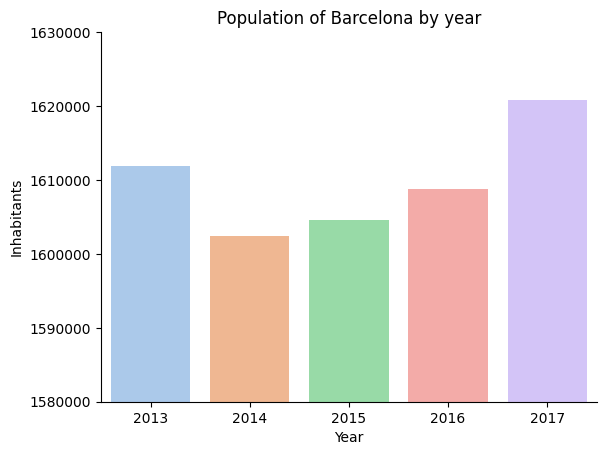

In [127]:
pby= sns.barplot(x='Year', y='Number', data=pop_year, palette="pastel")
plt.ylim(1580000,1630000)
plt.title("Population of Barcelona by year")
plt.ylabel("Inhabitants")
sns.despine(top=True)
plt.ticklabel_format(style='plain', axis='y')

In [108]:
pop_dist = pd.DataFrame(population.groupby(['Year', 'District.Name'], as_index=False)['Number'].sum(numeric_only=True)) #grouping by year and district name
pop_dist

,Year,District.Name,Number
0,2013,Ciutat Vella,103339
1,2013,Eixample,264780
2,2013,Gràcia,120949
3,2013,Horta-Guinardó,167743
4,2013,Les Corts,81640
5,2013,Nou Barris,165748
6,2013,Sant Andreu,146846
7,2013,Sant Martí,232826
8,2013,Sants-Montjuïc,182685
9,2013,Sarrià-Sant Gervasi,145266


In [142]:
pop_nei = pd.DataFrame(population.groupby(['Year', 'District.Name','Neighborhood.Name'])['Number'].sum(numeric_only=True)) 
#grouping by year and neighbourhood
pop_nei.reset_index()

,Year,District.Name,Neighborhood.Name,Number
0,2013,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",22769
1,2013,Ciutat Vella,el Barri Gòtic,16267
2,2013,Ciutat Vella,el Raval,48800
3,2013,Ciutat Vella,la Barceloneta,15503
4,2013,Eixample,Sant Antoni,38260
...,...,...,...,...
360,2017,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,25774
361,2017,Sarrià-Sant Gervasi,Sarrià,25032
362,2017,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",4670
363,2017,Sarrià-Sant Gervasi,el Putxet i el Farró,29470


In [152]:
pop_nei_dis = pd.merge(pop_nei, pop_dist[['Year', 'District.Name', 'Number']], on =['Year', 'District.Name'], how='left', suffixes=('', '_dist'))

In [153]:
pop_nei_dis

,Year,District.Name,Number,Number_dist
0,2013,Ciutat Vella,22769,103339
1,2013,Ciutat Vella,16267,103339
2,2013,Ciutat Vella,48800,103339
3,2013,Ciutat Vella,15503,103339
4,2013,Eixample,38260,264780
...,...,...,...,...
360,2017,Sarrià-Sant Gervasi,25774,149279
361,2017,Sarrià-Sant Gervasi,25032,149279
362,2017,Sarrià-Sant Gervasi,4670,149279
363,2017,Sarrià-Sant Gervasi,29470,149279


In [137]:
all_pop = pd.merge(a_pop, pop_year, on=['Year'], how='left')
all_pop

,Year,District.Name,Number_nei,Number_dist,Number
0,2013,Ciutat Vella,22769,103339,1611822
1,2013,Ciutat Vella,16267,103339,1611822
2,2013,Ciutat Vella,48800,103339,1611822
3,2013,Ciutat Vella,15503,103339,1611822
4,2013,Eixample,38260,264780,1611822
...,...,...,...,...,...
360,2017,Sarrià-Sant Gervasi,25774,149279,1620809
361,2017,Sarrià-Sant Gervasi,25032,149279,1620809
362,2017,Sarrià-Sant Gervasi,4670,149279,1620809
363,2017,Sarrià-Sant Gervasi,29470,149279,1620809


In [154]:
# I AM NOT GETTING WHAT I WANT, SO NEW APPROACH:
population2017 = pd.DataFrame(population[population['Year']==2017])

In [155]:
population2017

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124
...,...,...,...,...,...,...,...,...
14011,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Female,>=95,11
14012,2017,10,Sant Martí,70,el Besòs i el Maresme,Female,>=95,41
14013,2017,10,Sant Martí,71,Provençals del Poblenou,Female,>=95,28
14014,2017,10,Sant Martí,72,Sant Martí de Provençals,Female,>=95,57


In [157]:
population2017.columns

Index(['Year', 'District.Code', 'District.Name', 'Neighborhood.Code',
       'Neighborhood.Name', 'Gender', 'Age', 'Number'],
      dtype='object')

In [159]:
pop17_nei=population2017.groupby(['Year', 'District.Code', 'District.Name', 'Neighborhood.Code', 'Neighborhood.Name'], as_index=False)['Number'].sum()
pop17_nei

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Number
0,2017,1,Ciutat Vella,1,el Raval,47608
1,2017,1,Ciutat Vella,2,el Barri Gòtic,16062
2,2017,1,Ciutat Vella,3,la Barceloneta,14996
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22721
4,2017,2,Eixample,5,el Fort Pienc,32016
...,...,...,...,...,...,...
68,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,13629
69,2017,10,Sant Martí,70,el Besòs i el Maresme,23009
70,2017,10,Sant Martí,71,Provençals del Poblenou,20487
71,2017,10,Sant Martí,72,Sant Martí de Provençals,26146


In [160]:
pop17_dis=population2017.groupby(['Year', 'District.Code', 'District.Name'], as_index=False)['Number'].sum()
pop17_dis

,Year,District.Code,District.Name,Number
0,2017,1,Ciutat Vella,101387
1,2017,2,Eixample,266416
2,2017,3,Sants-Montjuïc,181910
3,2017,4,Les Corts,82033
4,2017,5,Sarrià-Sant Gervasi,149279
5,2017,6,Gràcia,121347
6,2017,7,Horta-Guinardó,168751
7,2017,8,Nou Barris,166579
8,2017,9,Sant Andreu,147594
9,2017,10,Sant Martí,235513


In [161]:
pop17=population2017.groupby(['Year'], as_index=False)['Number'].sum()
pop17

,Year,Number
0,2017,1620809


In [162]:
pop17_nei_dis = pd.merge(pop17_nei, pop17_dis[['Year', 'District.Code', 'District.Name', 'Number']], 
                     on=['Year', 'District.Code', 'District.Name'], how='left', suffixes=('_nei', '_dis'))
pop17_nei_dis

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Number_nei,Number_dis
0,2017,1,Ciutat Vella,1,el Raval,47608,101387
1,2017,1,Ciutat Vella,2,el Barri Gòtic,16062,101387
2,2017,1,Ciutat Vella,3,la Barceloneta,14996,101387
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22721,101387
4,2017,2,Eixample,5,el Fort Pienc,32016,266416
...,...,...,...,...,...,...,...
68,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,13629,235513
69,2017,10,Sant Martí,70,el Besòs i el Maresme,23009,235513
70,2017,10,Sant Martí,71,Provençals del Poblenou,20487,235513
71,2017,10,Sant Martí,72,Sant Martí de Provençals,26146,235513


In [164]:
pop17_all = pd.merge(pop17_nei_dis, pop17[['Year', 'Number']], on=['Year'], how= 'left', suffixes= ('', 'year'))
pop17_all

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Number_nei,Number_dis,Number
0,2017,1,Ciutat Vella,1,el Raval,47608,101387,1620809
1,2017,1,Ciutat Vella,2,el Barri Gòtic,16062,101387,1620809
2,2017,1,Ciutat Vella,3,la Barceloneta,14996,101387,1620809
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22721,101387,1620809
4,2017,2,Eixample,5,el Fort Pienc,32016,266416,1620809
...,...,...,...,...,...,...,...,...
68,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,13629,235513,1620809
69,2017,10,Sant Martí,70,el Besòs i el Maresme,23009,235513,1620809
70,2017,10,Sant Martí,71,Provençals del Poblenou,20487,235513,1620809
71,2017,10,Sant Martí,72,Sant Martí de Provençals,26146,235513,1620809


In [171]:
pop17_all['per_dis']=(pop17_all['Number_dis']/pop17_all['Number'])*100
pop17_all['per_nei']=(pop17_all['Number_nei']/pop17_all['Number_dis'])*100

pop17_all

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Number_nei,Number_dis,Number,per_dis,per_nei
0,2017,1,Ciutat Vella,1,el Raval,47608,101387,1620809,6.255333,46.956710
1,2017,1,Ciutat Vella,2,el Barri Gòtic,16062,101387,1620809,6.255333,15.842268
2,2017,1,Ciutat Vella,3,la Barceloneta,14996,101387,1620809,6.255333,14.790851
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22721,101387,1620809,6.255333,22.410171
4,2017,2,Eixample,5,el Fort Pienc,32016,266416,1620809,16.437224,12.017296
...,...,...,...,...,...,...,...,...,...,...
68,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,13629,235513,1620809,14.530583,5.786942
69,2017,10,Sant Martí,70,el Besòs i el Maresme,23009,235513,1620809,14.530583,9.769737
70,2017,10,Sant Martí,71,Provençals del Poblenou,20487,235513,1620809,14.530583,8.698883
71,2017,10,Sant Martí,72,Sant Martí de Provençals,26146,235513,1620809,14.530583,11.101723
